# Single stock analysis example in pyfolio

Here's a simple example where we produce a set of plots, called a tear sheet, for a stock.

## Import pyfolio

In [1]:
%matplotlib inline
import pyfolio as pf

## Fetch the daily returns for a stock

In [2]:
stock_rets = pf.utils.get_symbol_rets('FB')

## Create a full tear sheet for the single stock
This will show charts about returns and shock events.

Entire data start date: 2012-05-21 00:00:00+00:00
Entire data end date: 2015-08-04 00:00:00+00:00


Backtest Months: 38
                   Backtest
sortino_ratio          1.65
omega_ratio            1.18
max_drawdown          -0.48
calmar_ratio           0.79
annual_return          0.38
stability              0.87
sharpe_ratio           0.85
annual_volatility      0.44
alpha                  0.20
beta                   0.98

Worst Drawdown Periods
   net drawdown in %                  peak date                valley date  \
0              47.90  2012-05-21 00:00:00+00:00  2012-09-04 00:00:00+00:00   
1              22.06  2014-03-10 00:00:00+00:00  2014-04-28 00:00:00+00:00   
2              17.34  2013-10-18 00:00:00+00:00  2013-11-25 00:00:00+00:00   
4               9.21  2014-10-28 00:00:00+00:00  2014-11-19 00:00:00+00:00   
3               9.20  2015-03-24 00:00:00+00:00  2015-05-12 00:00:00+00:00   

               recovery date duration  
0  2013-07-25 00:00:00+00:00      309  

/opt/miniconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


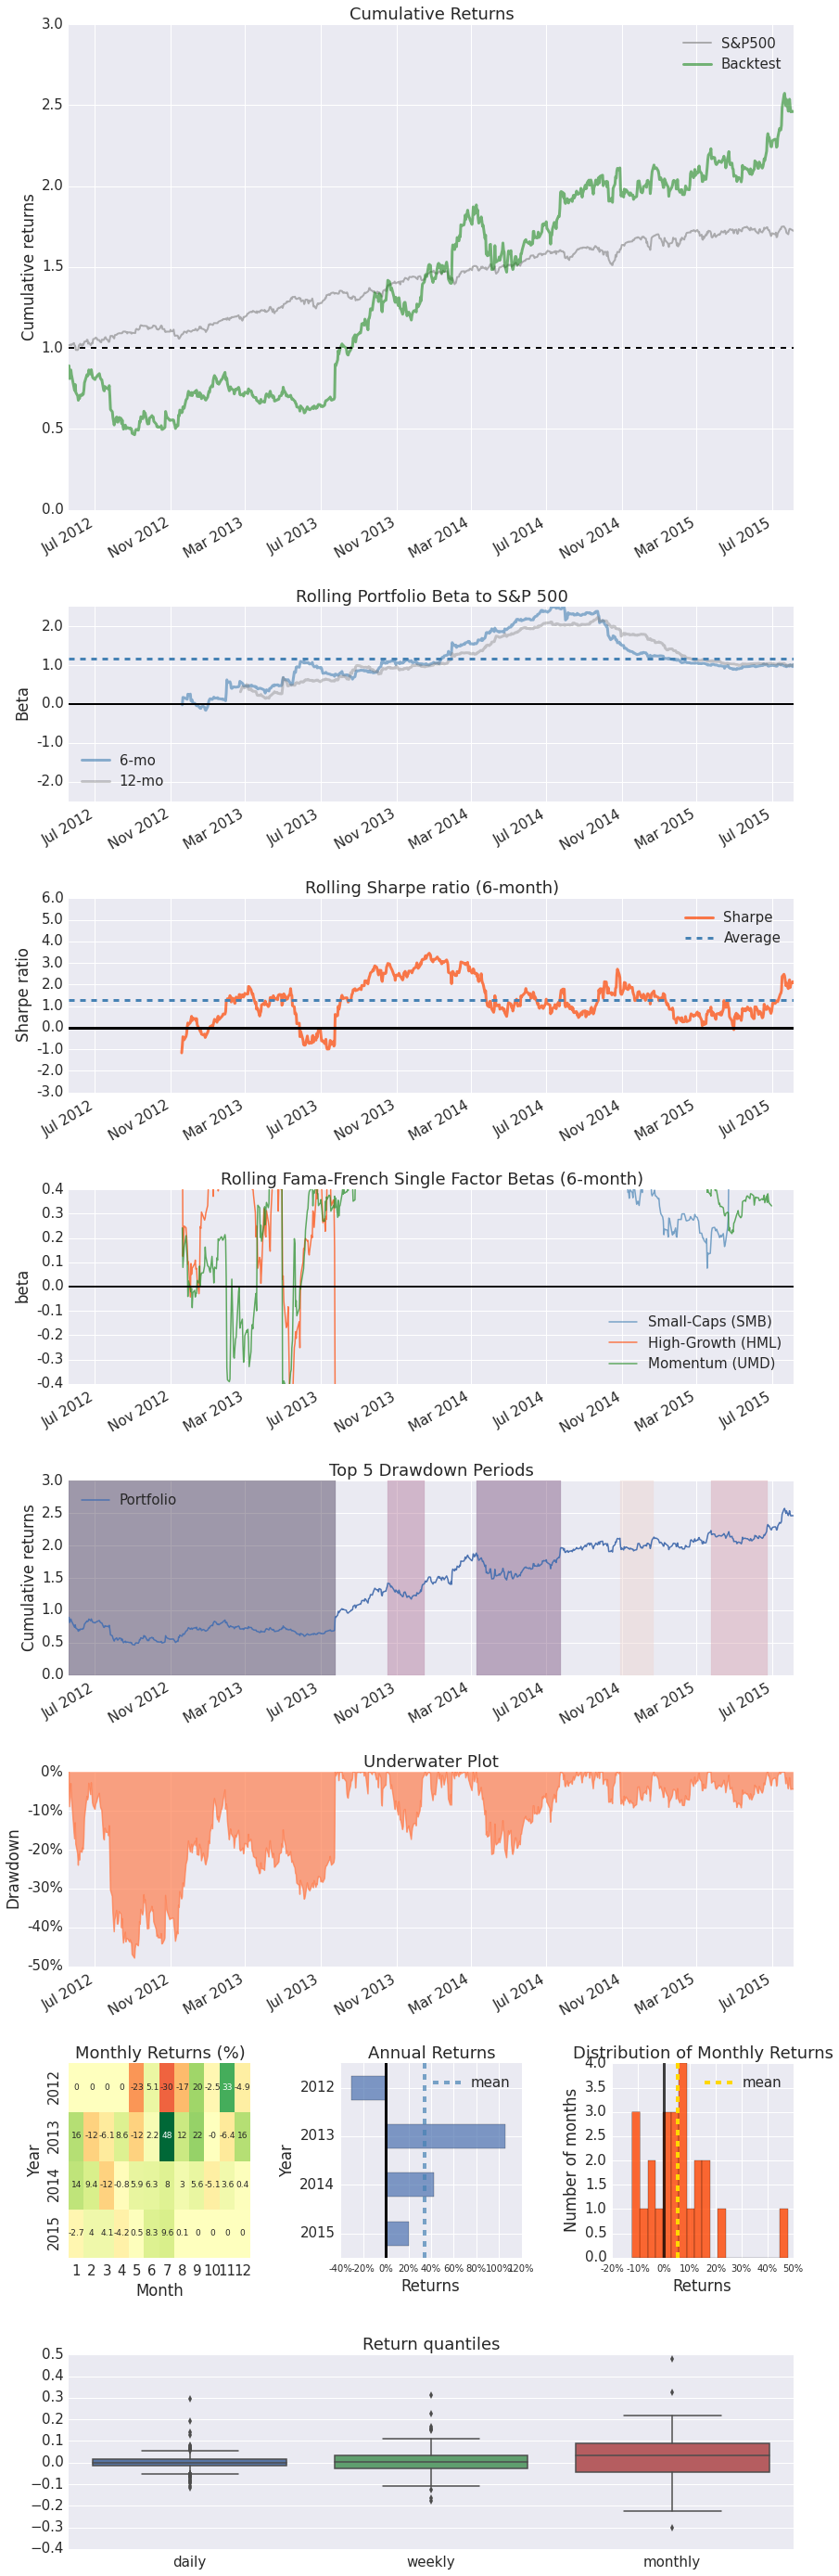

In [3]:
pf.create_returns_tear_sheet(stock_rets)

## Create a full tear sheet for an equal-weight portfolio of:
* Long SPY
* Short QQQ
* Long GLD
* Long TLT

Additionally, we set the live start date as an example.

In [4]:
stock_rets_SPY = pf.utils.get_symbol_rets('SPY')
stock_rets_QQQ = pf.utils.get_symbol_rets('QQQ')
stock_rets_GLD = pf.utils.get_symbol_rets('GLD')
stock_rets_TLT = pf.utils.get_symbol_rets('TLT')

In [5]:
portfolio_4_assets_rets = pf.timeseries.portfolio_returns([stock_rets_SPY, -1 * stock_rets_QQQ, stock_rets_GLD, stock_rets_TLT], 
                                exclude_non_overlapping=True)

Entire data start date: 2004-11-19 00:00:00+00:00
Entire data end date: 2015-08-04 00:00:00+00:00


Out-of-Sample Months: 21
Backtest Months: 106
                   Backtest  Out_of_Sample  All_History
sortino_ratio          0.96          -0.43         0.78
omega_ratio            1.12           0.95         1.09
max_drawdown          -0.11          -0.08        -0.13
calmar_ratio           0.41          -0.20         0.28
annual_return          0.05          -0.02         0.04
stability              0.94           0.04         0.83
sharpe_ratio           0.65          -0.28         0.53
annual_volatility      0.07           0.06         0.07
alpha                  0.05           0.00         0.04
beta                  -0.04          -0.17        -0.05

Worst Drawdown Periods
   net drawdown in %                  peak date                valley date  \
0              13.06  2012-11-13 00:00:00+00:00  2013-12-19 00:00:00+00:00   
2               8.96  2008-03-17 00:00:00+00:00  2008-08-1

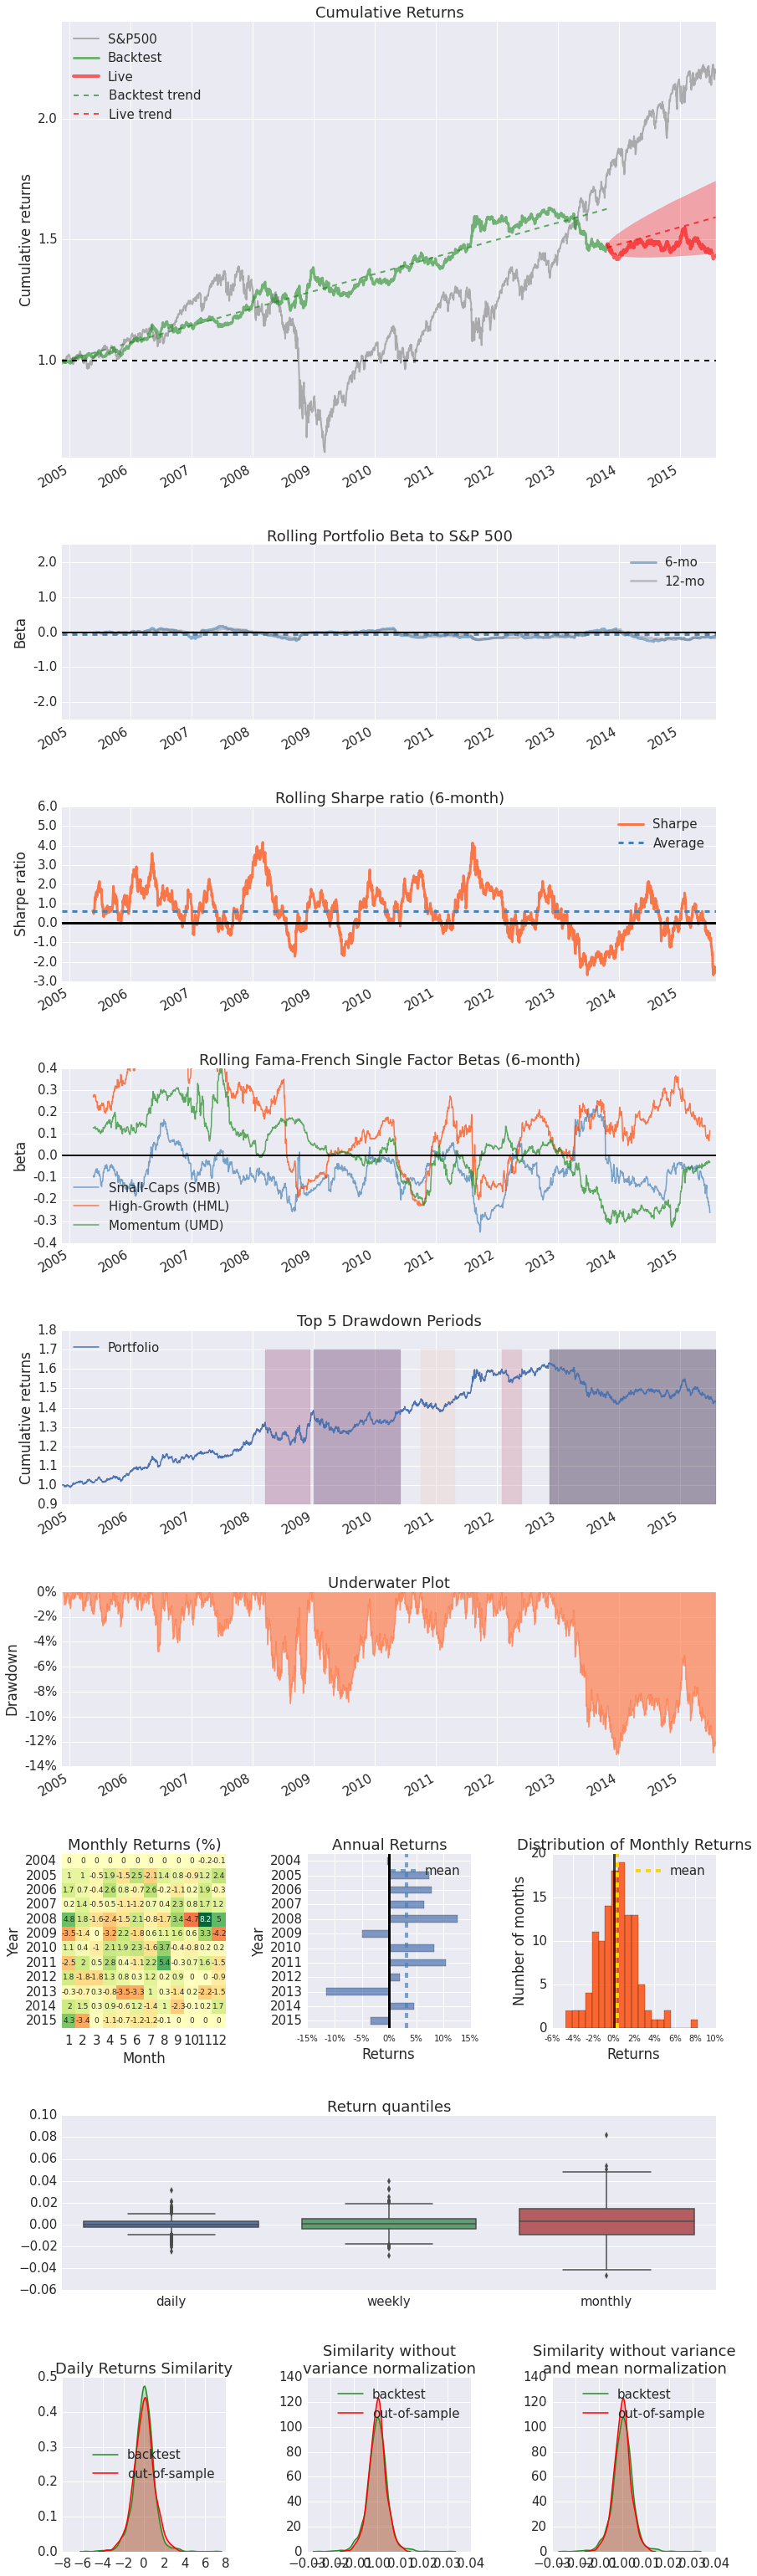

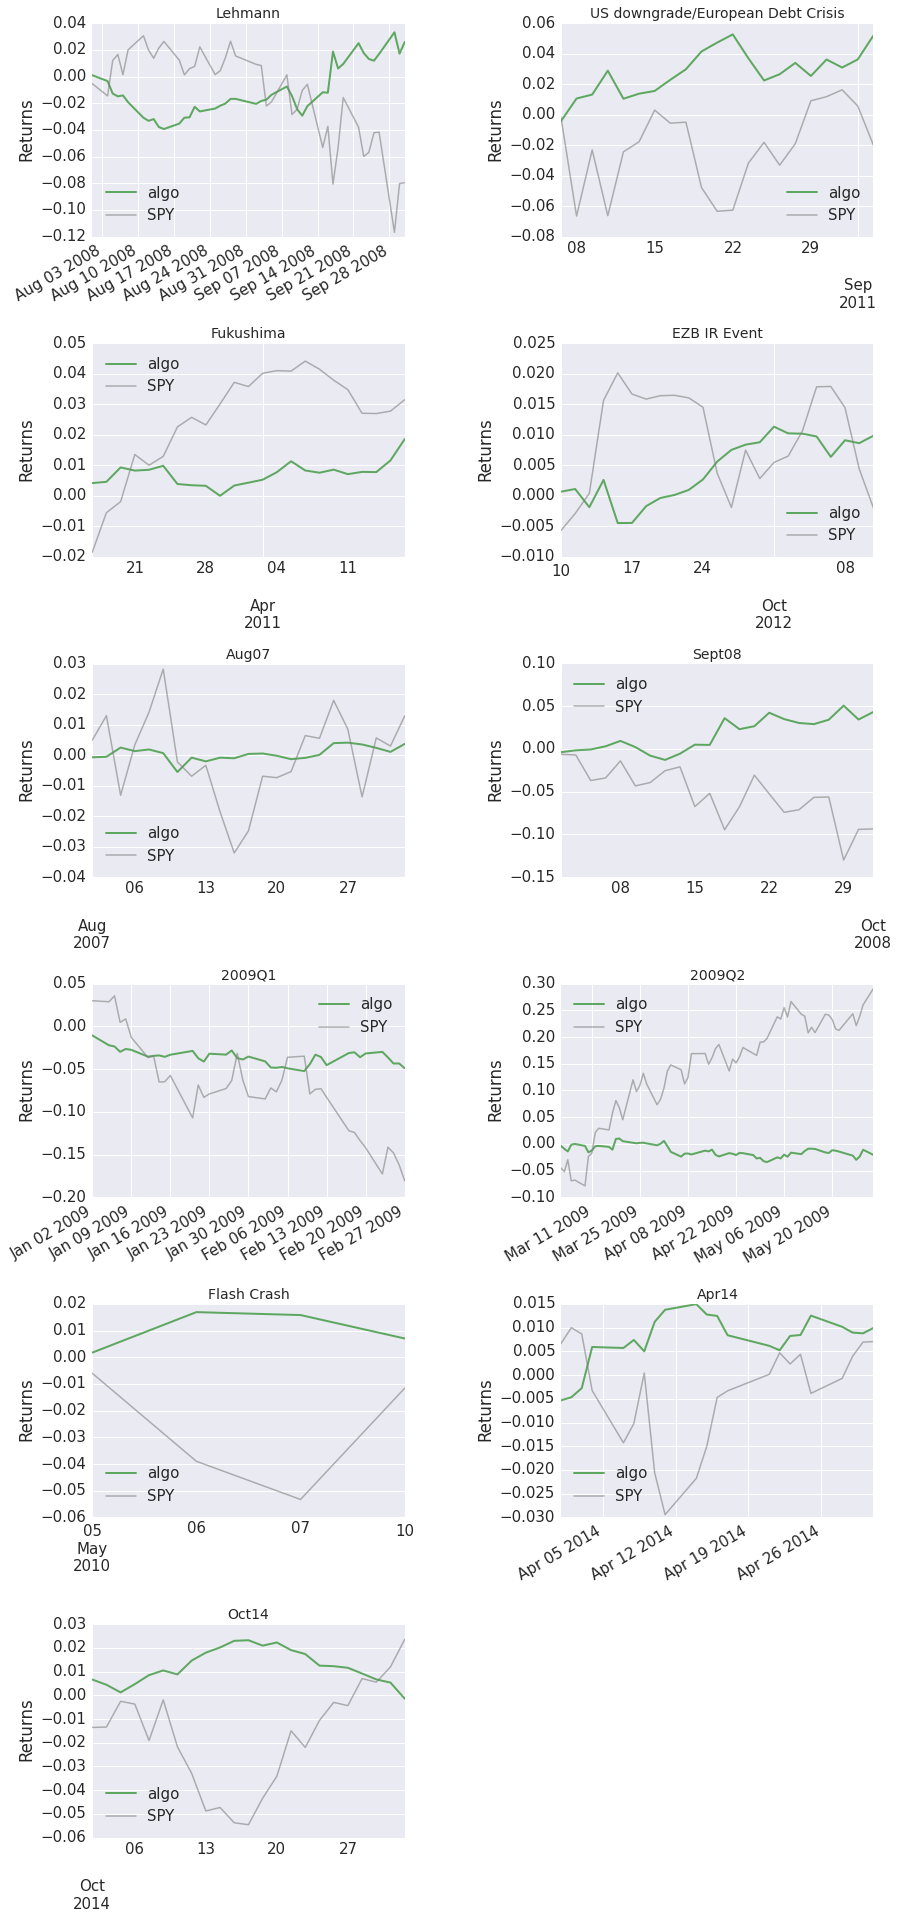

In [6]:
pf.create_full_tear_sheet(portfolio_4_assets_rets, live_start_date='2013-10-22')